In [1146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1147]:
### Loading the Dataset
data = pd.read_csv("House_Rent_Dataset.csv")

## Data Profiling

In [1148]:
data.info() # read all the possible features in the CSV

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [1149]:
data.isnull().sum() # check for nullity

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [1150]:
data.head # quick overview of the csv

<bound method NDFrame.head of        Posted On  BHK   Rent  Size            Floor    Area Type  \
0     2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1     2022-05-13    2  20000   800       1 out of 3   Super Area   
2     2022-05-16    2  17000  1000       1 out of 3   Super Area   
3     2022-07-04    2  10000   800       1 out of 2   Super Area   
4     2022-05-09    2   7500   850       1 out of 2  Carpet Area   
...          ...  ...    ...   ...              ...          ...   
4741  2022-05-18    2  15000  1000       3 out of 5  Carpet Area   
4742  2022-05-15    3  29000  2000       1 out of 4   Super Area   
4743  2022-07-10    3  35000  1750       3 out of 5  Carpet Area   
4744  2022-07-06    3  45000  1500     23 out of 34  Carpet Area   
4745  2022-05-04    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/F

## Data Cleaning

In [1151]:
data['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [1152]:
# Clean floor errors like "3 out of 2" or standalone values like "Ground" (for consistency)
floor_data = data['Floor']
floor_data.value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

In [1153]:
def validate_floors(floors_str):
    try:
        parts = floors_str.split(" out of ")
        if len(parts) != 2:
            return False
        x, y = parts
        if x <= y:
            return True
        elif x == 'Ground':
            return True
        elif x == 'Upper Basement' or x == 'Lower Basement':
            return True
        else:
            return False
    except:
        return False

floor_filter = data['Floor'].apply(validate_floors)
cleaned_floor_data = data[floor_filter]
cleaned_floor_data # This is now the dataset with cleaned data of the Floors column


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


## Data Analysis

<BarContainer object of 6 artists>

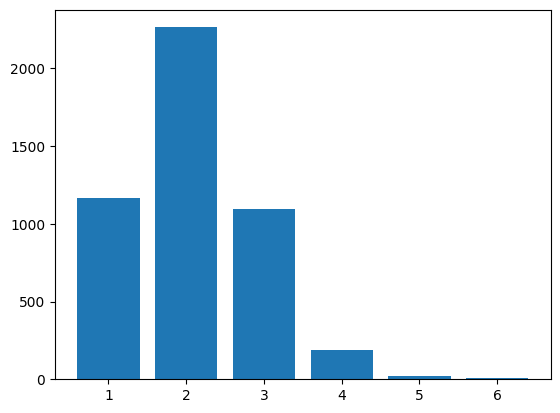

In [1154]:
plt.bar(cleaned_floor_data['BHK'].value_counts().index, data['BHK'].value_counts().values) # BHK can be used as a feature

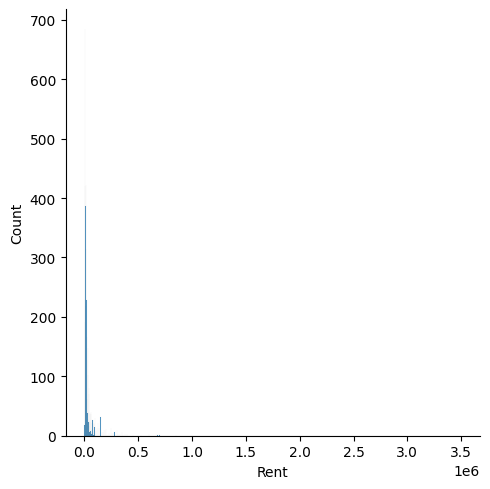

In [1155]:
sns.displot(cleaned_floor_data['Rent']) # too many outliers can affect the final output of the model. It will skew the value upwards.

In [1156]:
cleaned_floor_data['Rent'].describe() # Lots of abnormal outliers

count    4.350000e+03
mean     3.130881e+04
std      7.510355e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.500000e+04
75%      2.800000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [1157]:
# Define the lower and upper percentile thresholds
lower_percentile = 0.25  # To represent the lower end of house prices
upper_percentile = 0.75  # To represent the higher end of house prices

# Calculate the quantiles
lower_threshold = cleaned_floor_data['Rent'].quantile(lower_percentile)
upper_threshold = cleaned_floor_data['Rent'].quantile(upper_percentile)

# Filter out the rows with rent values outside the thresholds
no_rent_outliers = cleaned_floor_data[(cleaned_floor_data['Rent'] >= lower_threshold) & (cleaned_floor_data['Rent'] <= upper_threshold)]
no_rent_outliers


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2022-07-06,2,17000,855,4 out of 5,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [1158]:
no_rent_outliers['Rent'].describe() # more reasonable prices

count     2195.000000
mean     16096.513440
std       4855.964889
min      10000.000000
25%      12000.000000
50%      15000.000000
75%      20000.000000
max      28000.000000
Name: Rent, dtype: float64

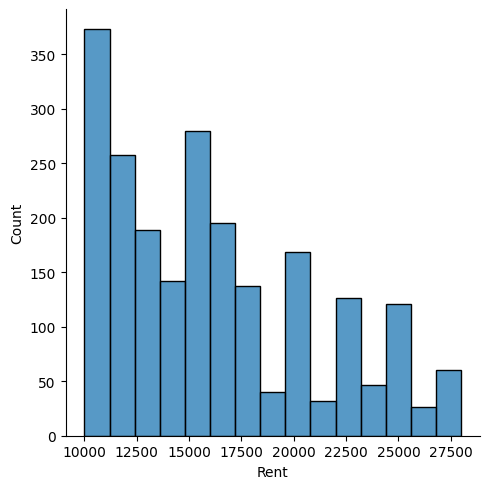

In [1159]:
sns.displot(no_rent_outliers['Rent'])

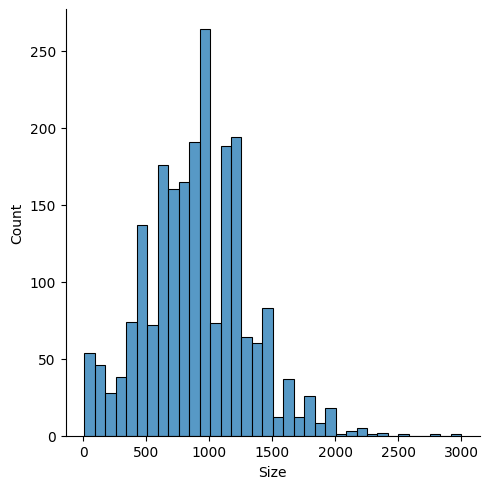

In [1160]:
sns.displot(no_rent_outliers['Size']) # Reasonable sizes. No need to adjust

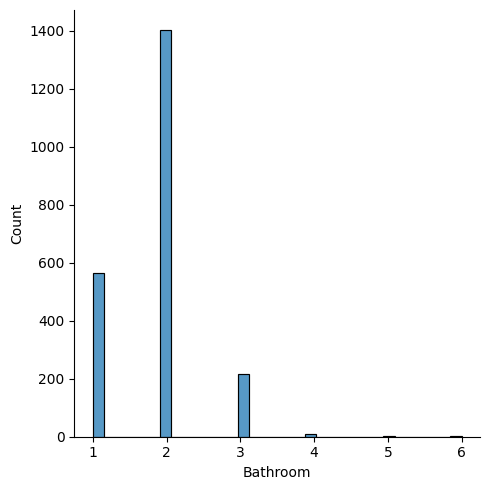

In [1161]:
sns.displot(no_rent_outliers['Bathroom']) # Reasonable sizes. No need to adjust

In [1162]:
no_rent_outliers['Floor'].value_counts()

Floor
1 out of 2         211
2 out of 4         185
1 out of 3         164
Ground out of 2    163
2 out of 3         160
                  ... 
18 out of 28         1
10 out of 22         1
23 out of 23         1
13 out of 14         1
1 out of 12          1
Name: count, Length: 126, dtype: int64

In [1163]:
# Add new features such as floor occupied, total floor
def floor_split(floor_data):
    # split the string into two, if possible
    try:
        new_floor_data = floor_data.split(' out of ')

        if (new_floor_data[0] == 'Ground'):
            new_floor_data[0] = 1
        if (new_floor_data[0] == 'Upper Basement'):
            new_floor_data[0] = 2
            new_floor_data[1] = new_floor_data[1] + 2
        if (new_floor_data[0] == 'Lower Basement'):
            new_floor_data[0] = 1
            new_floor_data[1] = new_floor_data[1] + 2

        tuple = (int(new_floor_data[0]),int(new_floor_data[1]))
    # if not, assume that it's a top-floor apartment (set to 1) 🤷‍♂️
    except:
        tuple = (int(new_floor_data[0]),int(new_floor_data[0]))

    return tuple

for index, row in no_rent_outliers.iterrows():
    no_rent_outliers.at[index, 'Floor'] = floor_split(row['Floor'])

no_rent_outliers[['Floor Location', 'Total Floors']] = no_rent_outliers['Floor'].apply(lambda x: pd.Series(x))

C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_13476\3654792527.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_rent_outliers[['Floor Location', 'Total Floors']] = no_rent_outliers['Floor'].apply(lambda x: pd.Series(x))
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_13476\3654792527.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_rent_outliers[['Floor Location', 'Total Floors']] = no_rent_outliers['Floor'].apply(lambda x: pd.Series(x))


In [1164]:
separated_floors = no_rent_outliers.drop(columns=['Floor'])
separated_floors

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Location,Total Floors
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
6,2022-06-21,2,10000,700,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2022-07-06,2,17000,855,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent,4,5
4739,2022-07-06,2,25000,1040,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner,2,4
4740,2022-06-02,2,12000,1350,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,2,2
4741,2022-05-18,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5


In [1165]:
separated_floors['Area Type'].value_counts()

Area Type
Super Area     1358
Carpet Area     836
Built Area        1
Name: count, dtype: int64

In [1166]:
separated_floors['Area Locality'].value_counts()

Area Locality
Velachery                                   18
Electronic City                             18
Miyapur, NH 9                               17
Madipakkam                                  17
K R Puram                                   13
                                            ..
State Bank Of India Colony, Hegganahalli     1
Margondanahalli                              1
Shanti Nagar                                 1
RT Nagar                                     1
Godavari Homes, Quthbullapur                 1
Name: count, Length: 1185, dtype: int64

In [1167]:
separated_floors['Area Locality'].value_counts()


Area Locality
Velachery                                   18
Electronic City                             18
Miyapur, NH 9                               17
Madipakkam                                  17
K R Puram                                   13
                                            ..
State Bank Of India Colony, Hegganahalli     1
Margondanahalli                              1
Shanti Nagar                                 1
RT Nagar                                     1
Godavari Homes, Quthbullapur                 1
Name: count, Length: 1185, dtype: int64

In [1168]:
# # Get value counts of each area locality
# value_counts = separated_floors['Area Locality'].value_counts()

# # Create a dictionary to map each area locality to its count
# locality_counts = dict(zip(value_counts.index, value_counts.values))

# # Map the counts to the 'Area Locality' column to create the 'Area Locality Popularity' column
# quantified_locality = separated_floors
# quantified_locality['Area Locality Popularity'] = separated_floors['Area Locality'].map(locality_counts)

# quantified_locality['Area Locality Popularity'].value_counts()
# quantified_locality = quantified_locality.drop(columns=['Area Locality'])

In [1169]:
# quantified_locality['Furnishing Status'].value_counts()

In [1170]:
separated_floors['Tenant Preferred'].value_counts()

Tenant Preferred
Bachelors/Family    1629
Bachelors            363
Family               203
Name: count, dtype: int64

In [1171]:
separated_floors['Point of Contact'].value_counts()

Point of Contact
Contact Owner    1845
Contact Agent     350
Name: count, dtype: int64

## Data Preprocessing

In [1172]:
final_data = separated_floors.drop(columns=['Posted On'])
final_data # this will now be the final dataset for the model

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Location,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,1,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
6,2,10000,700,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2,17000,855,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent,4,5
4739,2,25000,1040,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner,2,4
4740,2,12000,1350,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,2,2
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3,5


In [1173]:
# def one_hot_encode(data, column):
#     encoded = pd.get_dummies(data[column], drop_first= True)
#     data = data.drop(column, axis = 1)
#     data = data.join(encoded)
#     return data
def one_hot_encode(data, column, suffix=''):
    encoded = pd.get_dummies(data[column], drop_first=True, prefix=column+suffix)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [1174]:

#final_data = final_data.drop(columns=['City', 'Area Type', 'Tenant Preferred', 'Point of Contact'])
final_data = one_hot_encode(final_data, 'Area Type')
final_data = one_hot_encode(final_data, 'Area Locality', '')
final_data = one_hot_encode(final_data, 'City')
final_data = one_hot_encode(final_data, 'Furnishing Status')
final_data = one_hot_encode(final_data, 'Tenant Preferred')
final_data = one_hot_encode(final_data, 'Point of Contact')
final_data


,BHK,Rent,Size,Bathroom,Floor Location,Total Floors,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ in Miyapur, NH 9",Area Locality_355 konnur highroad Ayanavaram,...,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Owner
0,2,10000,1100,2,1,2,False,True,False,False,...,False,False,False,True,False,False,True,True,False,True
1,2,20000,800,1,1,3,False,True,False,False,...,False,False,False,True,False,True,False,True,False,True
2,2,17000,1000,1,1,3,False,True,False,False,...,False,False,False,True,False,True,False,True,False,True
3,2,10000,800,1,1,2,False,True,False,False,...,False,False,False,True,False,False,True,True,False,True
6,2,10000,700,2,1,4,False,True,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,2,17000,855,2,4,5,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4739,2,25000,1040,2,2,4,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
4740,2,12000,1350,2,2,2,False,True,False,False,...,False,False,True,False,False,False,True,True,False,True
4741,2,15000,1000,2,3,5,True,False,False,False,...,False,False,True,False,False,True,False,True,False,True


## Model Training
## Training and Test Split

In [1175]:
X = final_data.drop('Rent', axis= 1)
y = final_data['Rent']

In [1176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

## Standardize the Values

In [1177]:
from sklearn.preprocessing import StandardScaler    

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Get the Optimal Alpha Value

In [1178]:
# from sklearn.linear_model import LassoCV
# alphas = np.logspace(-3, 3, 11)
# lasso_cv = LassoCV(alphas=alphas).fit(X_train, y_train)
# best_alpha = lasso_cv.alpha_
# print(best_alpha)

## Modelling w/ Regularization

In [1179]:
# from sklearn import linear_model
# model = linear_model.LinearRegression()
# model.fit(X_train, y_train)
# model.coef_

from sklearn.linear_model import Ridge, LassoCV
ridge_model = Ridge(alpha = 63.0957344480193)
ridge_model.fit(X_train,y_train)

Ridge(alpha=63.0957344480193)

## Evaluation

### Quantitative Evaluation

In [1180]:
y_preds = ridge_model.predict(X_test)

In [1181]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", ridge_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 938.11068142 1476.76845226  903.93910285 ... -215.13090323  -37.07711954
 -417.33875375]
Mean squared error: 17146254.00
Coefficient of determination: 0.31


### Qualitative Evaluation

In [1182]:
sample_data = X.iloc[0]
sample_data

BHK                                      2
Size                                  1100
Bathroom                                 2
Floor Location                           1
Total Floors                             2
                                     ...  
Furnishing Status_Semi-Furnished     False
Furnishing Status_Unfurnished         True
Tenant Preferred_Bachelors/Family     True
Tenant Preferred_Family              False
Point of Contact_Contact Owner        True
Name: 0, Length: 1201, dtype: object

In [1183]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

c:\Users\Shaun Padrejuan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1184]:
model_rent_forecast = ridge_model.predict(sample_data_standardized)[0]
model_rent_forecast

10182.634282268878

In [1185]:
y.iloc[0]

10000

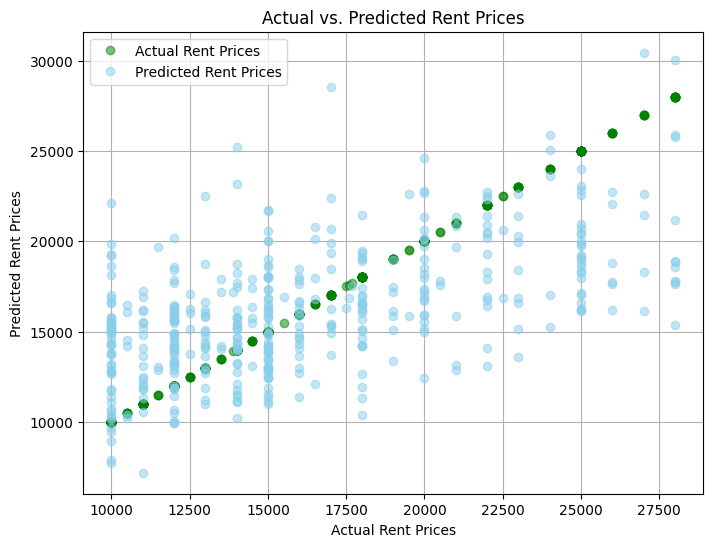

In [1186]:
plt.figure(figsize=(8,6))
plt.plot(y_test, y_test, 'o', alpha=0.5, color='green', label='Actual Rent Prices')
plt.plot(y_test, y_preds, 'o', alpha=0.5, color='skyblue', label='Predicted Rent Prices')

plt.title("Actual vs. Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")

plt.legend()
plt.grid(True)
plt.show()